In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [2]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [3]:
file_path = '../data/Telco_Customer_Churn_Dataset.csv'
df = pd.read_csv(file_path) 

In [4]:
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# shape and data types
print("Shape:", df.shape)
print("\nInfo:")
df.info() 

Shape: (7043, 21)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling 

In [6]:
# Missing values count per column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:\n", categorical_cols.tolist())

Categorical columns:
 ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [ ]:
# TotalCharges to numeric 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [9]:
# Check if any nulls were introduced
print("Missing TotalCharges values after conversion:", df['TotalCharges'].isnull().sum())

Missing TotalCharges values after conversion: 11


In [10]:
#Since ML models cannot handle missing numeric values, and 11 rows out of 7043 is a very small fraction, it's best to drop those rows
df = df.dropna(subset=['TotalCharges'])


In [11]:
#verifying
print("Remaining missing values:", df.isnull().sum().sum())

Remaining missing values: 0


In [13]:
#columns that don’t help our prediction — customerID. It's just a unique identifier and contains no meaningful pattern.
df.drop('customerID', axis=1, inplace=True)

In [14]:
# First, list binary categorical columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']

# Map 'Yes'/'No' and 'Male'/'Female' to 1/0
df[binary_cols] = df[binary_cols].replace({
    'Yes': 1,
    'No': 0,
    'Male': 1,
    'Female': 0
})

# Check if they're converted
print(df[binary_cols].head())


   gender  Partner  Dependents  PhoneService  PaperlessBilling  Churn
0       0        1           0             0                 1      0
1       1        0           0             1                 0      0
2       1        0           0             1                 1      1
3       1        0           0             0                 0      0
4       0        0           0             1                 1      1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8212\1668703771.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({


In [ ]:
# List of columns to one-hot encode
multi_class_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Apply one-hot encoding and drop the first category to avoid dummy variable trap
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

# new shape
print("New shape after encoding:", df.shape)


New shape after encoding: (7032, 31)


In [22]:
# Save the cleaned data
df.to_csv('../data/cleaned_churn_data.csv', index=False)


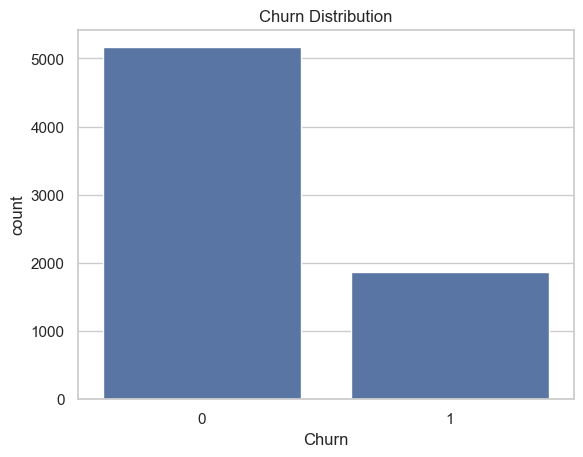

In [23]:
# Plot churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


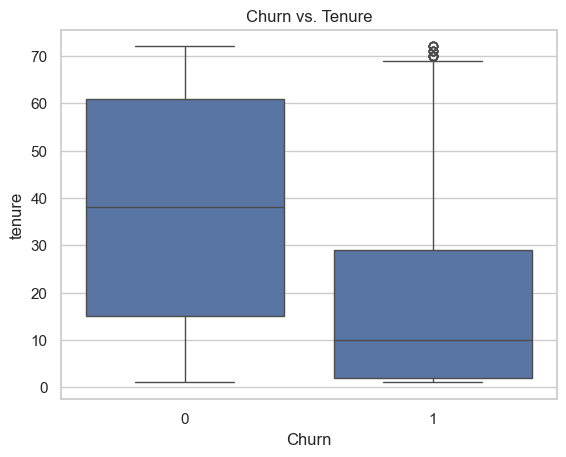

In [24]:
# Churn vs Tenure
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Churn vs. Tenure')
plt.show()
